# Project VI : NLP

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
#pio.renderers.default = 'png'

## 1. โหลด Dataset เข้าไปใน Python Pandas


In [4]:
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

## 2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว



In [5]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [6]:
df.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [7]:
df.sample(10)

,Review,Liked
787,I don't have very many words to say about this...,1
918,They brought a fresh batch of fries and I was ...,0
30,"Also there are combos like a burger, fries, an...",1
372,"The dining space is tiny, but elegantly decora...",1
178,"Not a weekly haunt, but definitely a place to ...",1
328,I go to far too many places and I've never see...,0
861,Talk about great customer service of course we...,1
335,Great service and food.,1
671,I promise they won't disappoint.,1
974,"Your servers suck, wait, correction, our serve...",0


## 3. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Note : no missing values

In [9]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## 4. สร้าง countplot ของ Liked


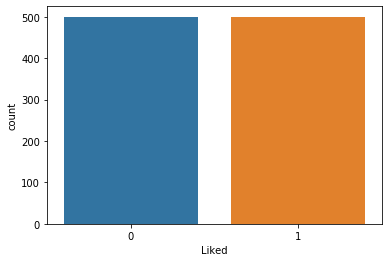

In [10]:
sns.countplot(df['Liked'])

## 5. หาความยาวของ Review ในแต่ละแถวแล้วเพิ่มเป็นคอลัมน์ใหม่


In [12]:
df['len'] = df['Review'].apply(len)
df

,Review,Liked,len
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


## 6. หา histogram ของความยาวของ text ทั้งหมด


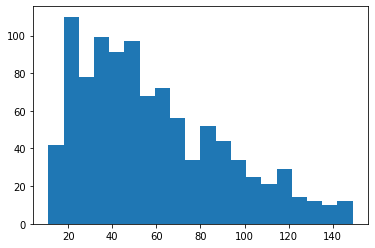

In [17]:
plt.hist(df['len'], bins=20)
plt.show()

## 7.หา histogram ของความยาวของ text แบ่งตาม Liked 


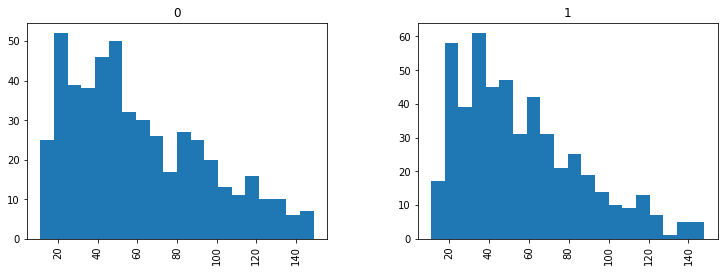

In [21]:
df.hist(column='len', by='Liked', bins=20, figsize=(12,4))
plt.show()

## 8. แสดงรีวิวเต็มของรีวิวที่ยาวที่สุด


In [31]:
print(df[df['len'] == df['len'].max()]['Review'].values[0])

The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).


## 9. หาความยาวของ Review เฉลี่ยต่อชนิดของ Liked


In [103]:
df.groupby(['Liked']).mean().reset_index().rename(columns={'len':'len_avg'})

,Liked,len_avg
0,0,60.75
1,1,55.88


## 10. ปริ้น Review 10 อันแรกที่คนชอบ และ ปริ้น Review 10 อันแรกที่คนไม่ชอบ โดยใช้ For Loop 


In [51]:
print('10 liked reviews')
i = 1
for index in df.index :
    if (df.loc[index]['Liked']==1) and (i <= 10) :
        print(i,'. ', df.loc[index]['Review'])
        i += 1

10 liked reviews
1 .  Wow... Loved this place.
2 .  Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
3 .  The selection on the menu was great and so were the prices.
4 .  The fries were great too.
5 .  A great touch.
6 .  Service was very prompt.
7 .  I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!
8 .  Highly recommended.
9 .  The food, amazing.
10 .  Service is also cute.


In [53]:
print('10 disliked reviews')
i = 1
for index in df.index :
    if (df.loc[index]['Liked']!=1) and (i <= 10) :
        print(i,'. ', df.loc[index]['Review'])
        i += 1

10 disliked reviews
1 .  Crust is not good.
2 .  Not tasty and the texture was just nasty.
3 .  Now I am getting angry and I want my damn pho.
4 .  Honeslty it didn't taste THAT fresh.)
5 .  The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
6 .  Would not go back.
7 .  The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.
8 .  I was disgusted because I was pretty sure that was human hair.
9 .  I was shocked because no signs indicate cash only.
10 .  Waitress was a little slow in service.


## 11.เขียนฟังก์ชั่นรวมที่ ลบ punctuation และ ลบ stopwords


In [69]:
from string import punctuation
from nltk.corpus import stopwords

In [74]:
def text_preprocess(text):
    # remove punctuations
    no_punc = [x for x in text if x not in punctuation]
    # join the result
    no_punc = ''.join(no_punc)
    # remove stopwords
    clean_text = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    
    return clean_text

## 12. ทำ Bag-Of-Words โดยใช้ Analyzer เป็น ฟังก์ชั่นที่ลบ punctuation และ ลบ stopwords


In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
# create bag-of-word transformer 
bag_transformer = CountVectorizer(analyzer=text_preprocess)
# fit the transformer
bag_transformer.fit(df['Review'])

CountVectorizer(analyzer=<function text_preprocess at 0x7f092a56d680>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

## 13. มี Vocabulary กี่คำใน Corpus หลังจากทำ BOW


In [79]:
len(bag_transformer.vocabulary_)

2159

## 14. ขนาดของ Sparse Matrix เป็นเท่าใดหลังจากทำ BOW



In [82]:
# bag-of-word of entire dataset
bag_all = bag_transformer.transform(df['Review'])
bag_all

<1000x2159 sparse matrix of type '<class 'numpy.int64'>'
	with 5606 stored elements in Compressed Sparse Row format>

Note : ขนาดของ sparse matrix คือ 1000x2159

## 15. หา % ของ Sparsity 


In [85]:
# non_zero elements
non_zero = bag_all.nnz

# all elements
all_elem = bag_all.shape[0] * bag_all.shape[1]

print('% of sparsity = ', (non_zero/all_elem)*100, '%')

% of sparsity =  0.25965724872626217 %


## 16. ทำ TF-IDF


In [86]:
from sklearn.feature_extraction.text import TfidfTransformer

In [87]:
# create TF-IDF transformer
tfidf_transformer = TfidfTransformer()

# fit and transform bag-of-word to TF-IDF
tfidf_all = tfidf_transformer.fit_transform(bag_all)

In [90]:
tfidf_all

<1000x2159 sparse matrix of type '<class 'numpy.float64'>'
	with 5606 stored elements in Compressed Sparse Row format>

In [89]:
print(tfidf_all[0])

  (0, 1540)	0.321857544607006
  (0, 442)	0.6694802913378217
  (0, 248)	0.6694802913378217


## 17. สร้าง Classifier ด้วย MultinomialNB


In [91]:
from sklearn.naive_bayes import MultinomialNB

In [92]:
clf = MultinomialNB()

## 18. ทำนายผล และสร้าง Confusion Matrix


In [94]:
# เลือก X และ y
X = tfidf_all
y = df['Liked']

print(X.shape)
print(y.shape)

(1000, 2159)
(1000,)


In [96]:
# fit the classifier
clf.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [97]:
# predict that the customer like or not
y_pred_multNB = clf.predict(X)

In [98]:
from sklearn import metrics

In [100]:
cm = metrics.confusion_matrix(y, y_pred_multNB)
cm

array([[486,  14],
       [ 21, 479]])

## 19. ทดสอบวัดผลด้วย Training Data และประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision


In [104]:
print('Accuracy : ', metrics.accuracy_score(y, y_pred_multNB))
print('F1 score : ', metrics.f1_score(y, y_pred_multNB))
print('Precision : ', metrics.precision_score(y, y_pred_multNB))
print('Recall : ', metrics.recall_score(y, y_pred_multNB))

Accuracy :  0.965
F1 score :  0.9647532729103725
Precision :  0.9716024340770791
Recall :  0.958


## 20. สร้าง Classifier ด้วย GaussianNB


In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
# create Gaussian Naive Bayes classifier
clf = GaussianNB()

In [108]:
# fit the classifier
clf.fit(X.toarray(), y)

GaussianNB(priors=None, var_smoothing=1e-09)

## 21. ทำนายผล และสร้าง Confusion Matrix


In [110]:
# make prediction
y_pred_gausNB = clf.predict(X.toarray())

In [112]:
# make confusion matrix
metrics.confusion_matrix(y, y_pred_gausNB)

array([[456,  44],
       [  0, 500]])

## 22. ทดสอบวัดผลด้วย Training Data และประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision


In [113]:
print('Accuracy : ', metrics.accuracy_score(y, y_pred_gausNB))
print('F1 score : ', metrics.f1_score(y, y_pred_gausNB))
print('Precision : ', metrics.precision_score(y, y_pred_gausNB))
print('Recall : ', metrics.recall_score(y, y_pred_gausNB))

Accuracy :  0.956
F1 score :  0.9578544061302682
Precision :  0.9191176470588235
Recall :  1.0


## 23. Split data ด้วยอัตราส่วน 0.2


In [114]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Liked'], test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800,)
(800,)
(200,)
(200,)


## 24. สร้าง Data Pipeline


In [119]:
from sklearn.pipeline import Pipeline

In [125]:
# create steps or collection of transformers and classifier
steps = [
    ('bow', CountVectorizer(analyzer=text_preprocess)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
]

In [126]:
# create the pipeline
pipeline = Pipeline(steps)

In [127]:
# fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocess at 0x7f092a56d680>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

## 25. ทำนายผล และสร้าง Confusion Matrix


In [128]:
y_pred_pipe = pipeline.predict(X_test)

In [130]:
# print confusion matrix
metrics.confusion_matrix(y_test, y_pred_pipe)

array([[74, 16],
       [32, 78]])

## 26. ทดสอบวัดผลด้วย Testing Data และประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision


In [131]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred_pipe))
print('F1 score : ', metrics.f1_score(y_test, y_pred_pipe))
print('Precision : ', metrics.precision_score(y_test, y_pred_pipe))
print('Recall : ', metrics.recall_score(y_test, y_pred_pipe))

Accuracy :  0.76
F1 score :  0.764705882352941
Precision :  0.8297872340425532
Recall :  0.7090909090909091
